# Decision Tree Regression

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [20]:
data = pd.read_csv('doctor fees.csv')
data.head(5)

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Prof. Dr. Syed Shamsuddin,QUETTA,Dermatologist,"MBBS, MCPS, FCPS",30.0,827,98,14.0,13,"National Hospital, Near Quetta Laboratory Prin...",https://www.marham.pk/doctors/quetta/dermatolo...,5000.0
1,Dr. Jaffar Ali,QUETTA,Dermatologist,"MBBS, MCPS (Dermatology), FDV (Austria)",32.0,1250,97,16.0,13,"Quetta Hospital, Quetta City, Quetta",https://www.marham.pk/doctors/quetta/dermatolo...,3000.0
2,Asst. Prof. Dr. Syed Bilal Shams,QUETTA,"Dermatologist, Cosmetic Surgeon","MBBS, FCPS (Dermatology), Fellowship In Dermat...",15.0,1294,99,15.0,15,Skin Center Dermatologist Dr. Syed Bilal Ahmed...,https://www.marham.pk/doctors/quetta/dermatolo...,5000.0
3,Asst. Prof. Dr. Surjeet Kumar,QUETTA,Dermatologist,"MBBS, FCPS(Dermatology)",12.0,114,99,14.0,7,"Doctors Hospital, Quetta City, Quetta",https://www.marham.pk/doctors/quetta/dermatolo...,2000.0
4,Dr. Palwasha Jalil,QUETTA,Dermatologist,"MBBS, FCPS (Dermatology) Agha Khan University",8.0,24,100,19.0,16,"Aria Institute Of Medical And Health Sciences,...",https://www.marham.pk/doctors/quetta/dermatolo...,1500.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2652 non-null   object 
 1   City                             2652 non-null   object 
 2   Specialization                   2652 non-null   object 
 3   Doctor Qualification             2652 non-null   object 
 4   Experience(Years)                2652 non-null   float64
 5   Total_Reviews                    2652 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2652 non-null   int64  
 7   Avg Time to Patients(mins)       2646 non-null   float64
 8   Wait Time(mins)                  2652 non-null   int64  
 9   Hospital Address                 2648 non-null   object 
 10  Doctors Link                     2652 non-null   object 
 11  Fee(PKR)                         2651 non-null   float64
dtypes: float64(3), int64

# 1-Handling missing data

In [22]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         6
Wait Time(mins)                    0
Hospital Address                   4
Doctors Link                       0
Fee(PKR)                           1
dtype: int64

In [23]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean['Avg Time to Patients(mins)'] = data['Avg Time to Patients(mins)'].fillna(data['Avg Time to Patients(mins)'].mean())
data_clean['Hospital Address'] = data["Hospital Address"].fillna(data['Hospital Address'].mode()[0])
data_clean['Fee(PKR)'] = data['Fee(PKR)'].fillna(data['Fee(PKR)'].mean())
data_clean.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Prof. Dr. Syed Shamsuddin,QUETTA,Dermatologist,"MBBS, MCPS, FCPS",30.0,827,98,14.0,13,"National Hospital, Near Quetta Laboratory Prin...",https://www.marham.pk/doctors/quetta/dermatolo...,5000.0
1,Dr. Jaffar Ali,QUETTA,Dermatologist,"MBBS, MCPS (Dermatology), FDV (Austria)",32.0,1250,97,16.0,13,"Quetta Hospital, Quetta City, Quetta",https://www.marham.pk/doctors/quetta/dermatolo...,3000.0
2,Asst. Prof. Dr. Syed Bilal Shams,QUETTA,"Dermatologist, Cosmetic Surgeon","MBBS, FCPS (Dermatology), Fellowship In Dermat...",15.0,1294,99,15.0,15,Skin Center Dermatologist Dr. Syed Bilal Ahmed...,https://www.marham.pk/doctors/quetta/dermatolo...,5000.0
3,Asst. Prof. Dr. Surjeet Kumar,QUETTA,Dermatologist,"MBBS, FCPS(Dermatology)",12.0,114,99,14.0,7,"Doctors Hospital, Quetta City, Quetta",https://www.marham.pk/doctors/quetta/dermatolo...,2000.0
4,Dr. Palwasha Jalil,QUETTA,Dermatologist,"MBBS, FCPS (Dermatology) Agha Khan University",8.0,24,100,19.0,16,"Aria Institute Of Medical And Health Sciences,...",https://www.marham.pk/doctors/quetta/dermatolo...,1500.0


In [24]:
data_clean.isnull().sum()

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee(PKR)                           0
dtype: int64

# 2-Encoding Categorical Data

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, -1].values
data_clean.drop("Fee(PKR)",axis=1,inplace = True)
data_clean.drop("Doctors Link",axis=1,inplace = True)
data_clean.drop("Doctor Name",axis=1,inplace = True)
X = data_clean.iloc[:, 0:].values
X.shape

(2652, 9)

In [26]:
X[0]

array(['QUETTA', 'Dermatologist', 'MBBS, MCPS, FCPS', 30.0, 827, 98, 14.0,
       13,
       'National Hospital, Near Quetta Laboratory Prince Road, Quetta'],
      dtype=object)

In [27]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,8])], remainder='passthrough')
X =ct.fit_transform(X).toarray()

In [28]:
print(X.shape)
print(y.shape)

(2652, 2677)
(2652,)


# 3-Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

# 4-Splitting the dataset into training and test sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
import sklearn.metrics as sm
Y_pred = model.predict(X_train)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_train, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_train, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 2.44
Mean squared error train= 736.29
Median absolute error train= 0.0
Explain variance score train= 1.0
R2 score train= 1.0


## Visualising the Decision Tree results

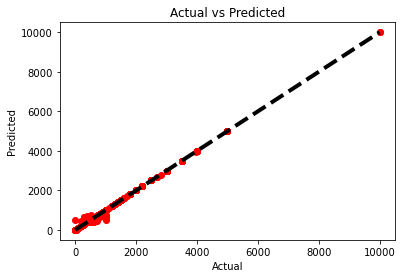

In [18]:
# Plotting actual vs predicted values
# Predict the target values
Y_pred = model.predict(X_train)
plt.scatter(Y_train, Y_pred, color='red')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()